 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [172]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [173]:
# Reading whale returns
#Define path for the .csv
whale_path = Path('Resources/whale_returns.csv')
#transform the csv into a dataframe, set 'Date' as the index, set the format of the dates to datetime 
whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
#preview the data
whale_df.head()

/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_37572/915485342.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [174]:
# Count nulls
whale_df.isnull().sum() 

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [175]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [176]:
# Reading algorithmic returns
#Define path for the .csv
algo_path = Path('Resources/algo_returns.csv')
#transform the csv into a dataframe, set 'Date' as the index, set the format of the dates to datetime 
algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
#preview the data
algo_df.head()

/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_37572/1942660301.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [177]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [178]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [179]:
# Reading S&P 500 Closing Prices
#Define path for the .csv
sp500_path = Path('Resources/sp500_history.csv')
#transform the csv into a dataframe, set 'Date' as the index, set the format of the dates to datetime 
sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
#preview the data
sp500_df.head()

/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_37572/3841949520.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_37572/3841949520.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [180]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [181]:
# Fix Data Types
# remove the dollar sign
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
# change data type from object to float
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [182]:
# Calculate Daily Returns
# sort data in chronological order
sp500_df.sort_index(inplace=True)
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [183]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna().copy()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [184]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={'Close':'S&P500'})
sp500_daily_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [185]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns = pd.concat([whale_df, algo_df, sp500_daily_returns], axis='columns', join='inner')
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

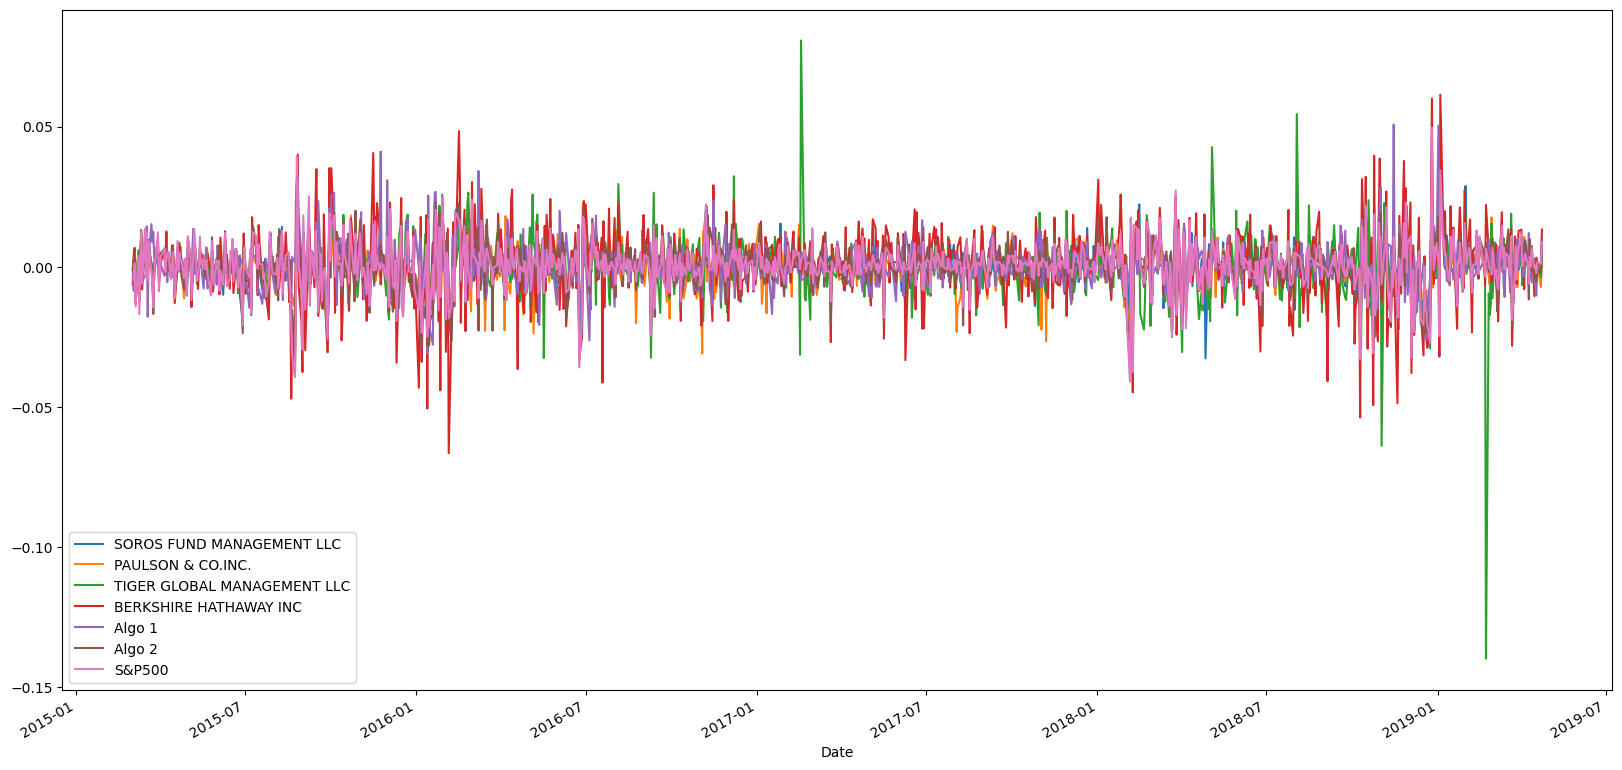

In [186]:
# Plot daily returns of all portfolios
joined_returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

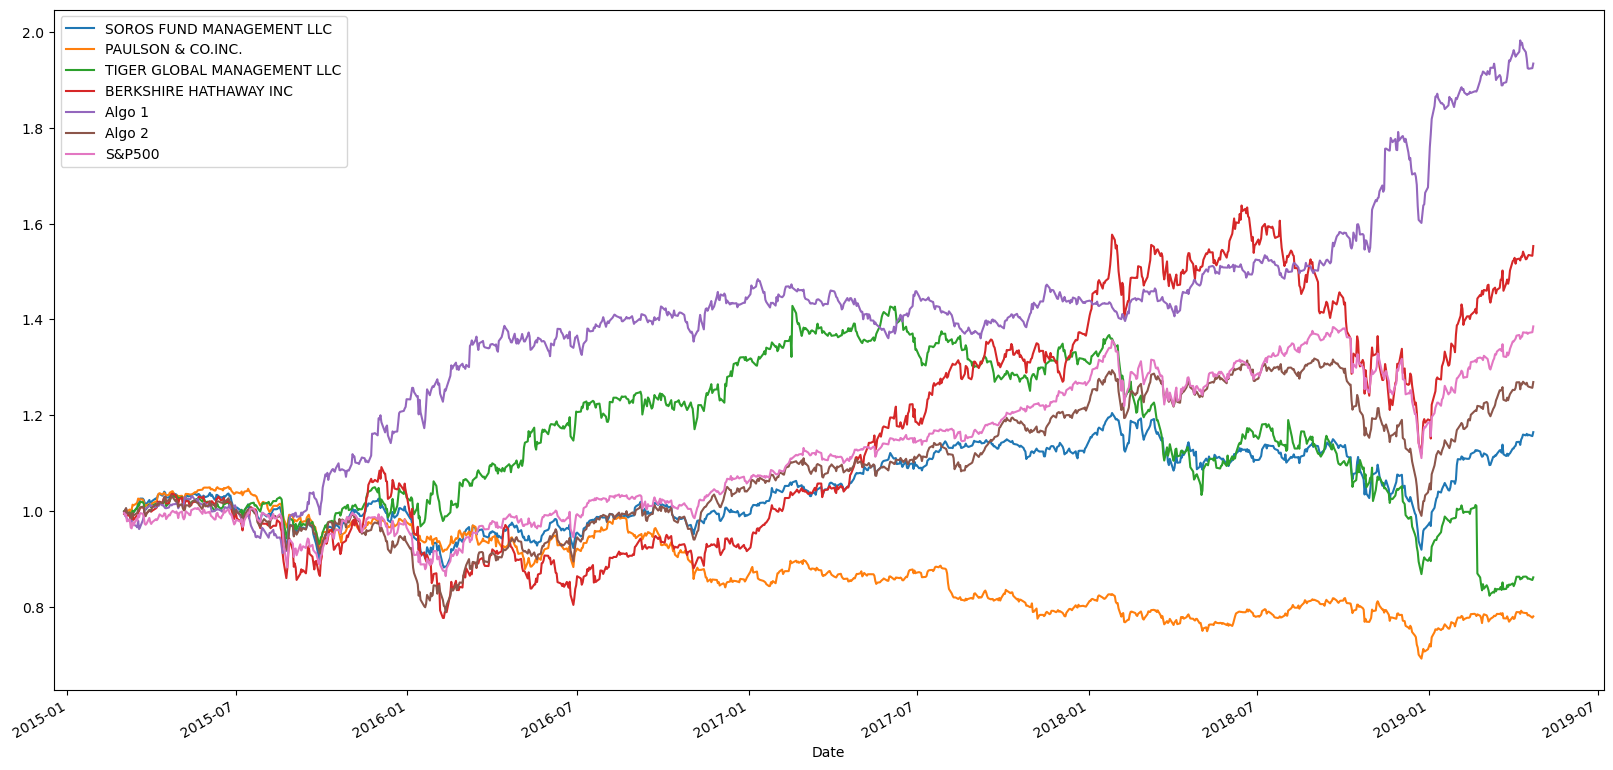

In [187]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+joined_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

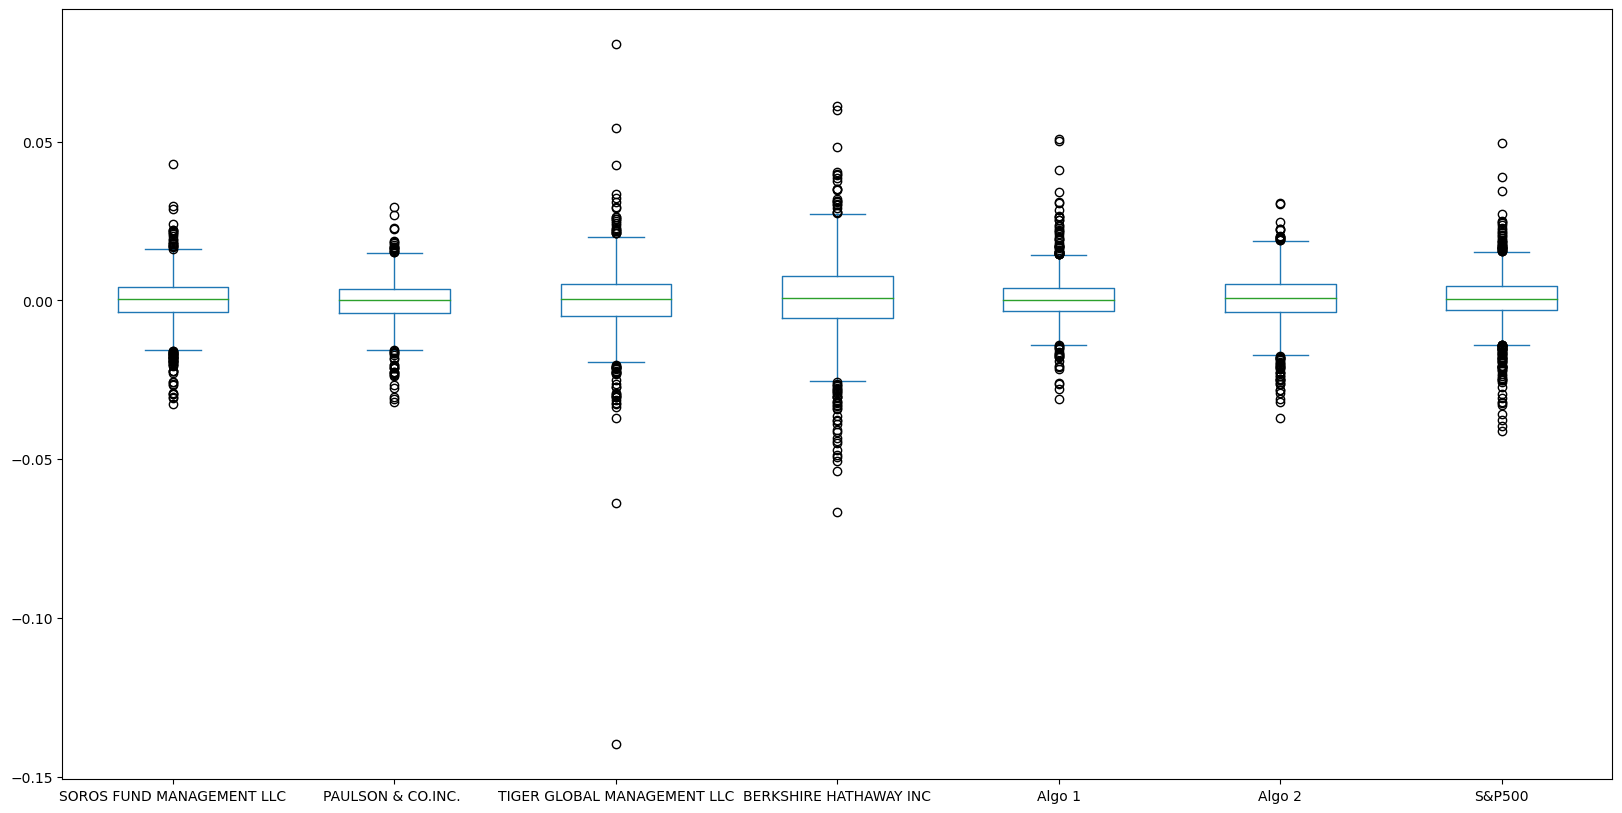

In [188]:
# Box plot to visually show risk
joined_returns.plot(kind='box', figsize=(20, 10))

### Calculate Standard Deviations

In [189]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [190]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = joined_returns['S&P500'].std()

# Determine which portfolios are riskier than the S&P 500
daily_std.sort_values(ascending=True)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P500                         0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [191]:
print('Tiger Global Management LLC and Bershire Hathaway Inc are riskier than the S&P500.')

Tiger Global Management LLC and Bershire Hathaway Inc are riskier than the S&P500.


### Calculate the Annualized Standard Deviation

In [192]:
# Calculate the annualized standard deviation (252 trading days)
annulaized_std = daily_std*np.sqrt(252)
annulaized_std.sort_values(ascending=True)

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P500                         0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

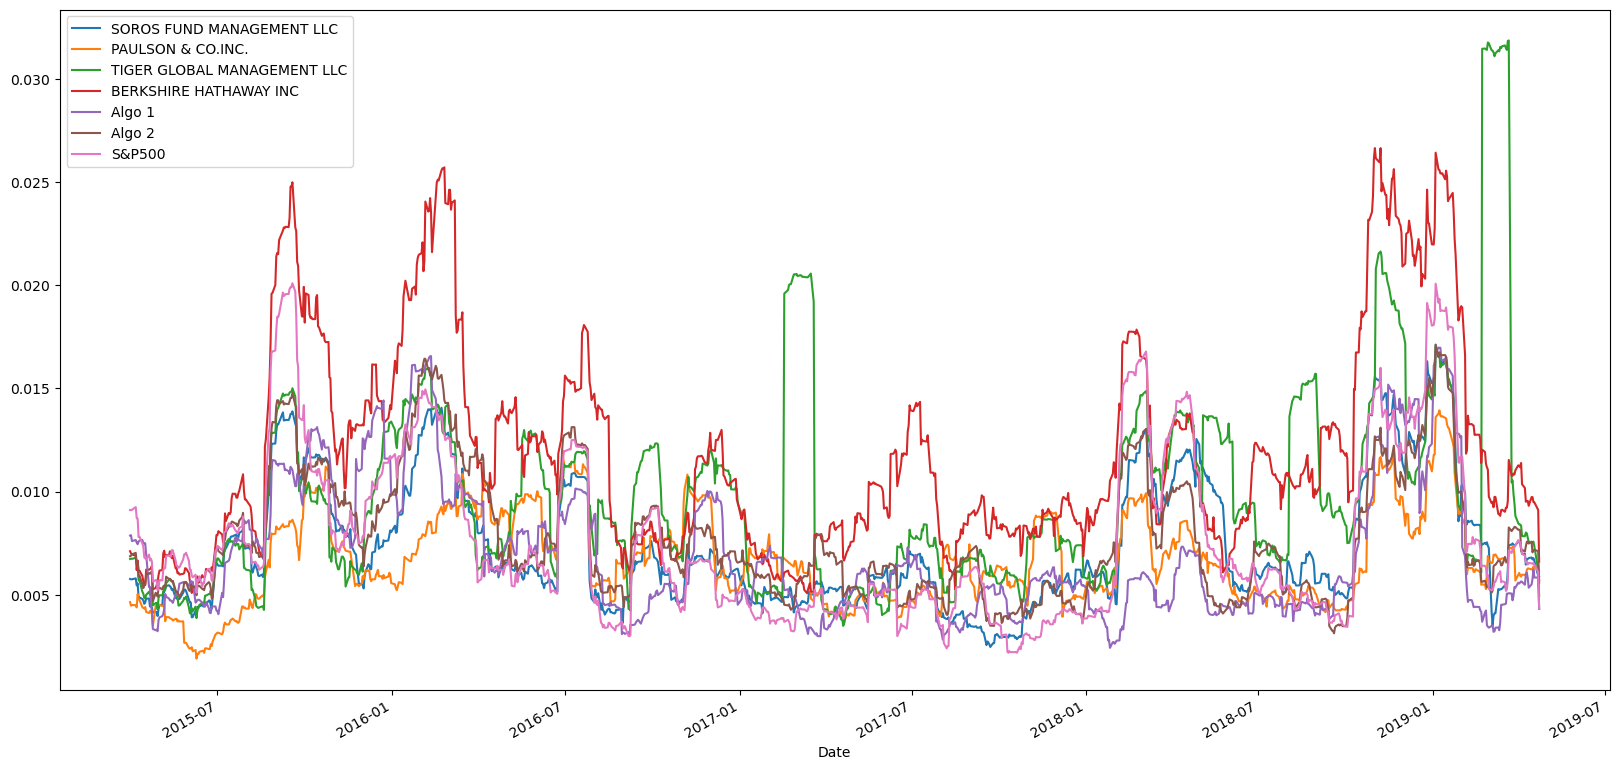

In [193]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = joined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [194]:
# Calculate the correlation
correlation = joined_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [195]:
print('Based on the correlation we can infer that Algo2 and Soros Fund Management LLC most closely mimick the S&P500.')

Based on the correlation we can infer that Algo2 and Soros Fund Management LLC most closely mimick the S&P500.


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of Berkshire Hathaway Inc.'}, xlabel='Date'>

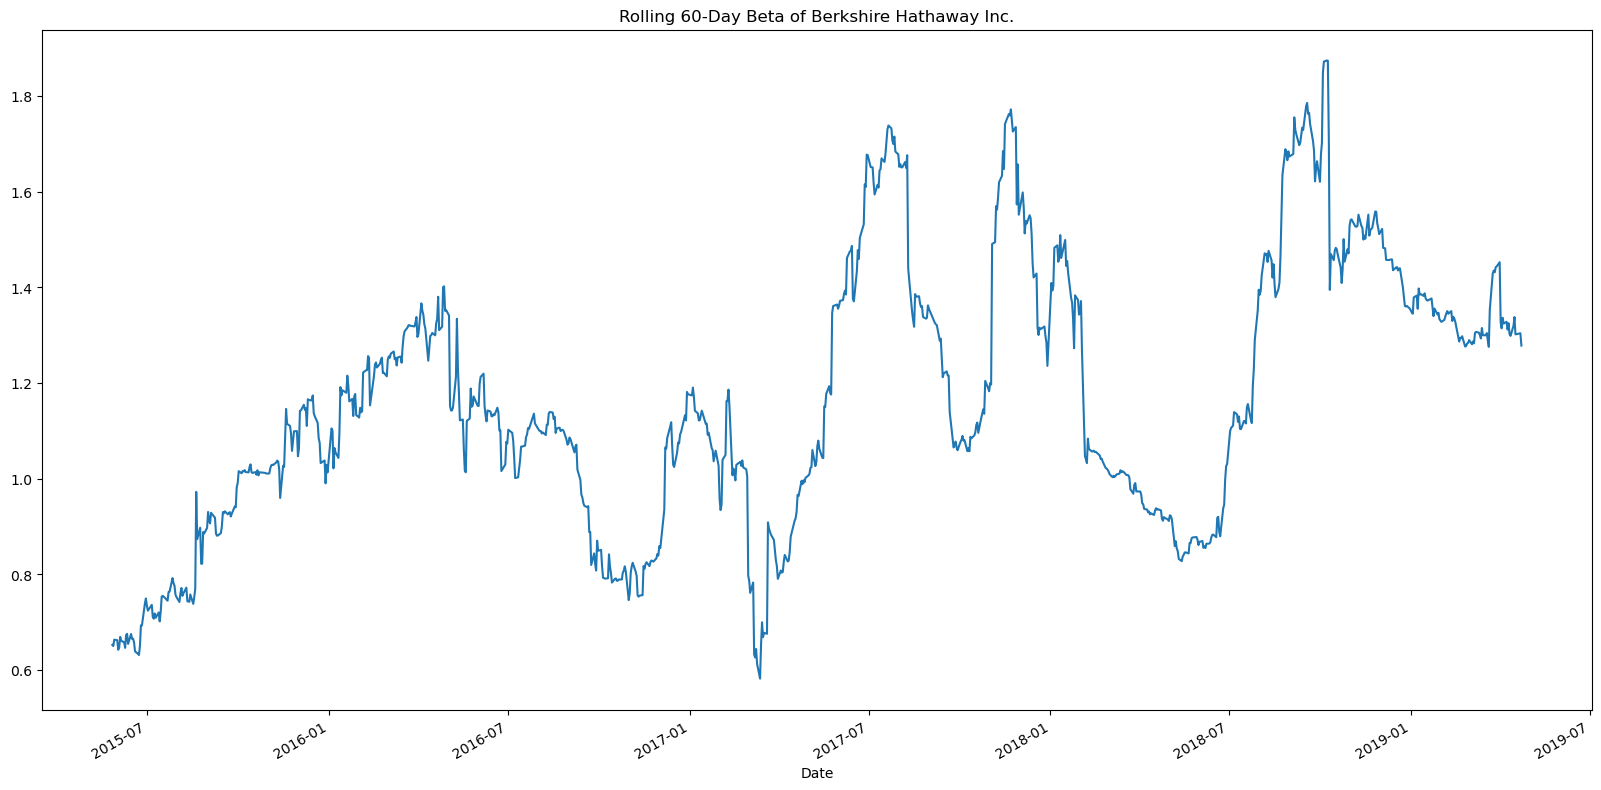

In [196]:
# Calculate covariance of Berkshire Hathaway Inc portfolio
covariance = joined_returns['BERKSHIRE HATHAWAY INC'].cov(joined_returns['S&P500'])
# Calculate variance of S&P 500
variance = joined_returns['S&P500'].var()
# Computing beta
berkshire_hathaway_inc_beta = covariance/variance

# Plot beta trend for a 60-day window
rolling_covariance = joined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(joined_returns['S&P500'])
rolling_variance = joined_returns['S&P500'].rolling(window=60).var()
berkshire_hathaway_inc_rolling_beta = rolling_covariance/rolling_variance
berkshire_hathaway_inc_rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Berkshire Hathaway Inc.')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

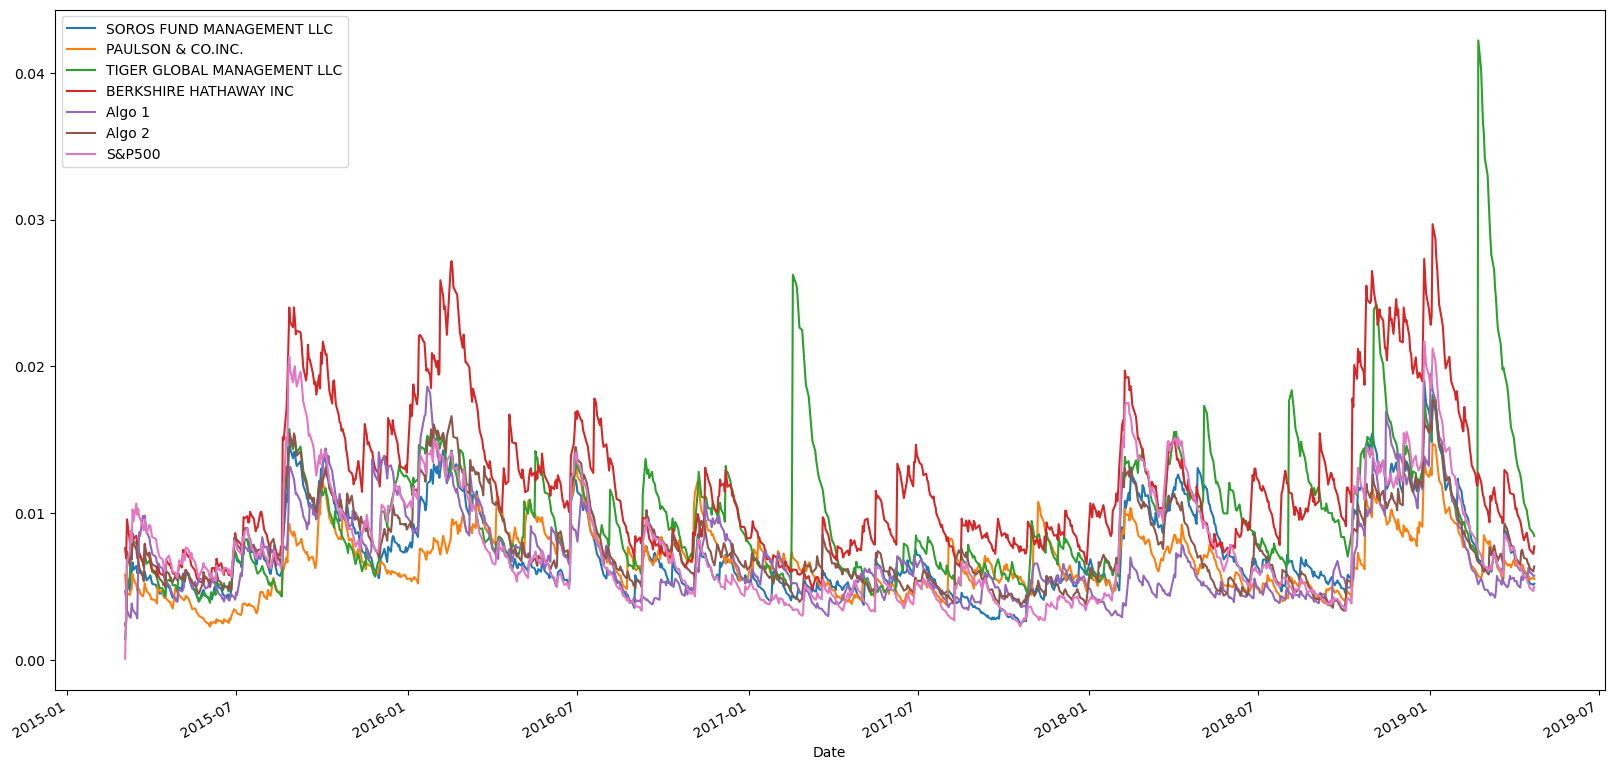

In [197]:
# Use `ewm` to calculate the rolling window
ewm_rolling_std = joined_returns.ewm(span=21).std()
# Plot the rolling standard deviation
ewm_rolling_std.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [198]:
# Annualized Sharpe Ratios
# Assume risk-free rate of return is 0
sharpe_ratio = (joined_returns.mean() * 252) / (joined_returns.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

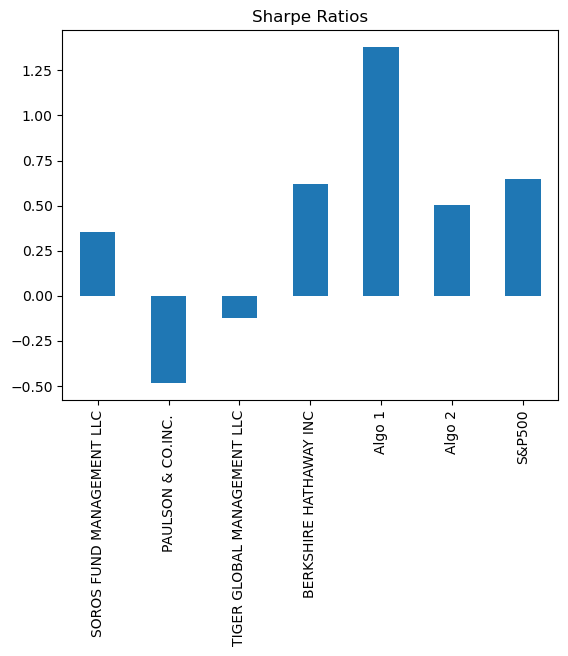

In [199]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

- Algo 1 outperformed the Whale's portfolios and S&P500 with a much higher Sharpe Ratio which indicates that Algo 1 generates a higher return.
- Algo 2 was outperformed by only Berkshire Hathaway Inc. and the S&P500. And while all they are all positive and generating returns, Berkshire Hathaway Inc and the S&P500 have better risk-adjusted profiles than Algo 2. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [200]:
# Reading data from 1st stock - Apple inc.
#Define path for the .csv
aapl_path = Path('Resources/aapl_historical.csv')
#transform the csv into a dataframe, set 'Date' as the index, set the format of the dates to datetime 
aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
#preview the data
aapl_df.head()

/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_37572/2100601784.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [201]:
# Reading data from 2nd stock - Costco Wholesale Corporation
#Define path for the .csv
cost_path = Path('Resources/cost_historical.csv')
#transform the csv into a dataframe, set 'Date' as the index, set the format of the dates to datetime 
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
#preview the data
cost_df.head()

/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_37572/1890397085.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [202]:
# Reading data from 3rd stock - Alphabet Inc.
#Define path for the .csv
goog_path = Path('Resources/goog_historical.csv')
#transform the csv into a dataframe, set 'Date' as the index, set the format of the dates to datetime 
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
#preview the data
goog_df.head()

/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_37572/2234197072.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [203]:
# Combine all stocks in a single DataFrame
joined_stocks = pd.concat([aapl_df, cost_df, goog_df], axis='rows', join='inner')
joined_stocks

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [204]:
# Reset Date index
# the reset ensures that the date column is not the index and a column in the data set
joined_stocks = joined_stocks.reset_index()
joined_stocks

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75
...,...,...,...
745,2018-05-17,GOOG,1078.59
746,2018-05-16,GOOG,1081.77
747,2018-05-15,GOOG,1079.23
748,2018-05-14,GOOG,1100.20


In [205]:
# Reorganize portfolio data by having a column per symbol
joined_stocks = joined_stocks.pivot(index='Trade DATE', columns='Symbol', values='NOCP')
joined_stocks

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [206]:
# Calculate daily returns
portfolio_daily_returns = joined_stocks.pct_change()
# Drop NAs
portfolio_daily_returns.dropna(inplace=True)
# Display sample data
portfolio_daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [207]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = portfolio_daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [208]:
# Join your returns DataFrame to the original returns DataFrame
joined_returns_portfolio = pd.concat([portfolio_returns, joined_returns], axis='columns', join='inner')
joined_returns_portfolio = joined_returns_portfolio.rename(columns={0:'My Portfolio'})
joined_returns_portfolio.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [209]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_returns_portfolio = joined_returns_portfolio.dropna().copy()
joined_returns_portfolio.isnull().sum()

My Portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P500                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [210]:
# Calculate the annualized `std`
daily_std = joined_returns_portfolio.std()
annulaized_std = daily_std*np.sqrt(252)
annulaized_std.sort_values(ascending=True)


PAULSON & CO.INC.              0.116732
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
S&P500                         0.152054
My Portfolio                   0.211496
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: >

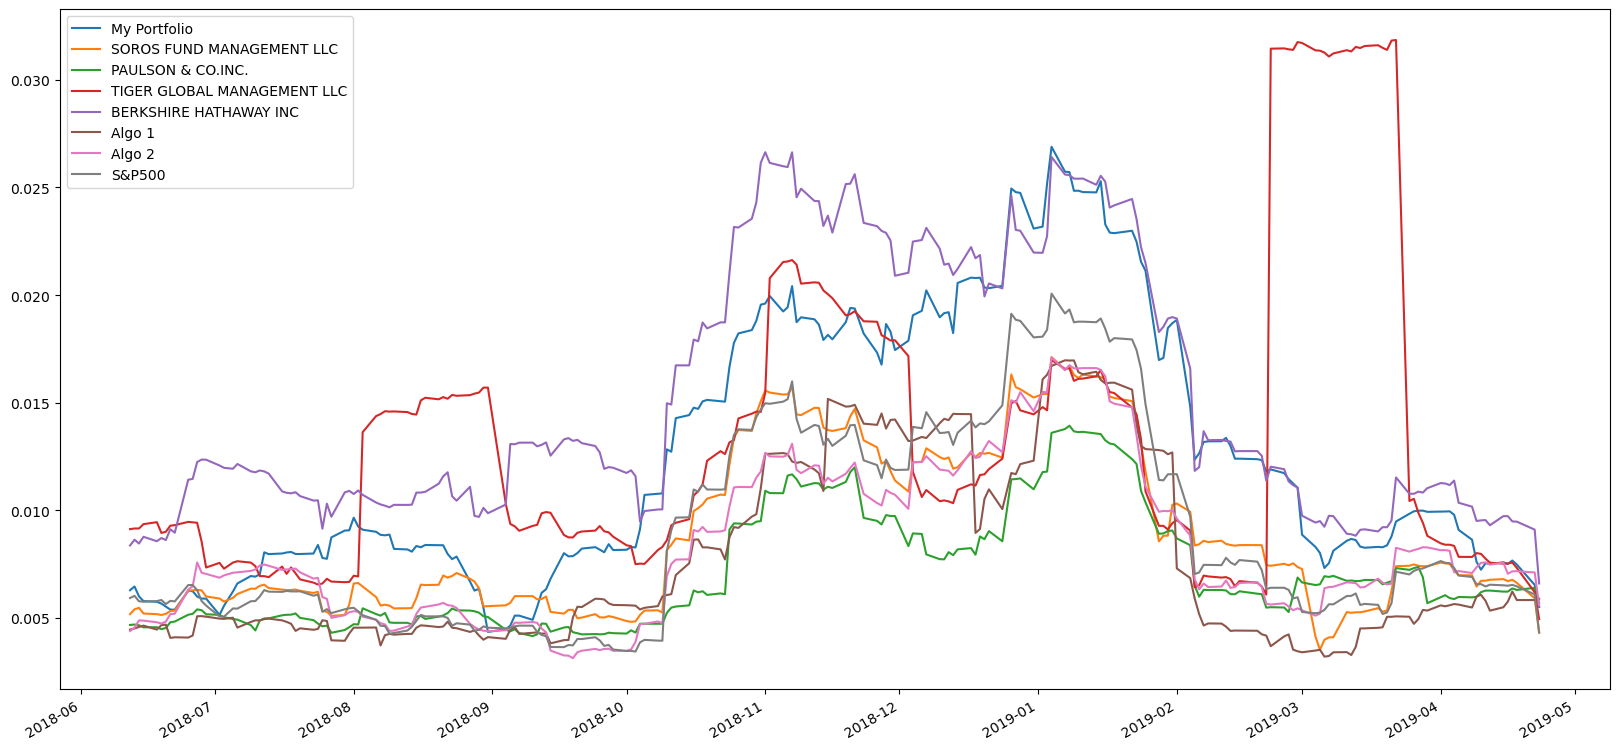

In [211]:
# Calculate rolling standard deviation
portfolio_rolling_std = joined_returns_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
portfolio_rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [212]:
# Calculate and plot the correlation
portfolio_correlation = joined_returns_portfolio.corr()
portfolio_correlation

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
My Portfolio,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P500,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of My Portfolio.'}>

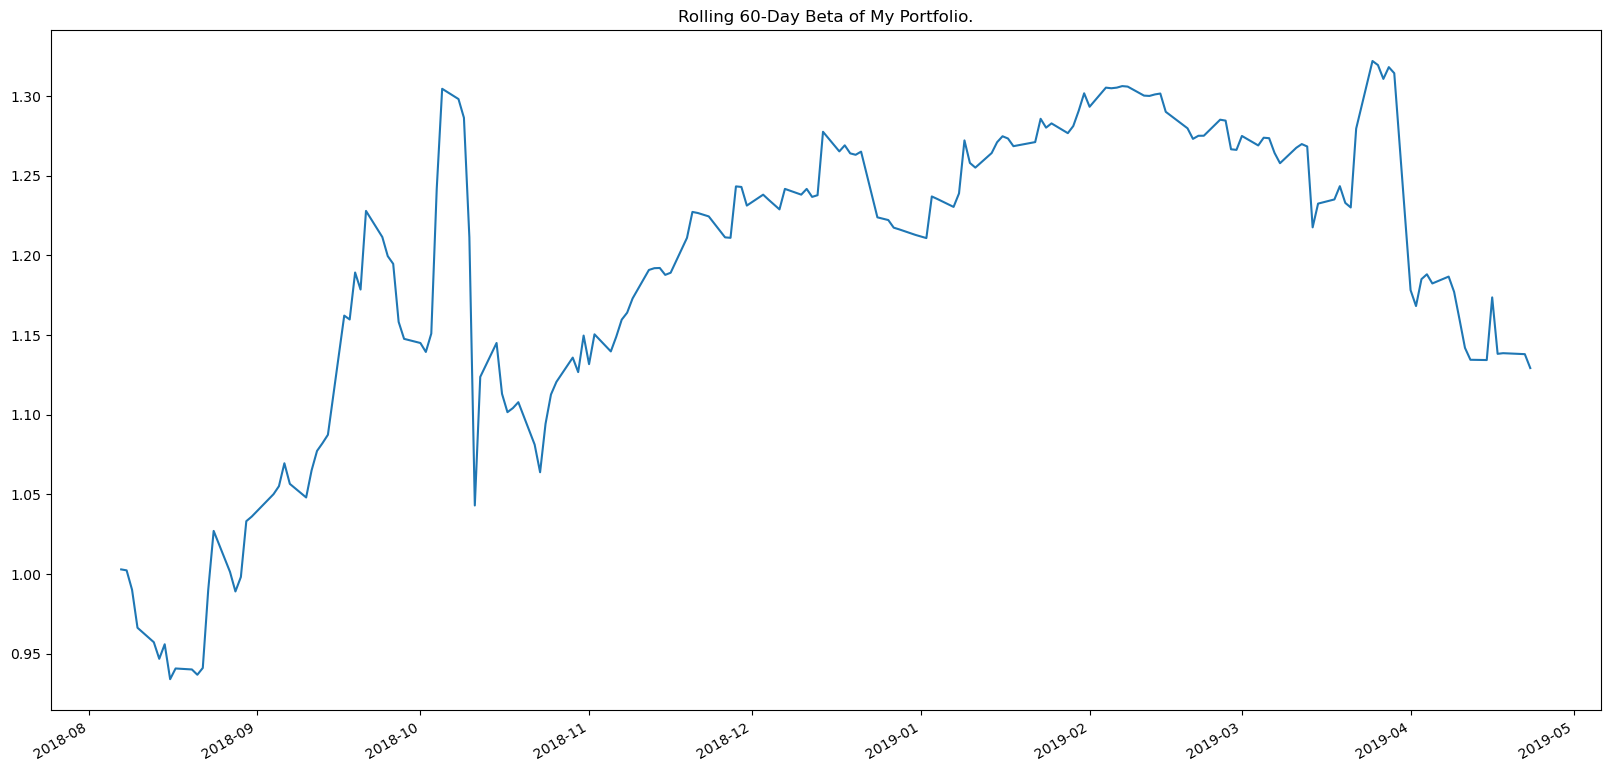

In [213]:
# Calculate and plot Beta
portfolio_rolling_covariance = joined_returns_portfolio['My Portfolio'].rolling(window=60).cov(joined_returns['S&P500'])
rolling_variance = joined_returns['S&P500'].rolling(window=60).var()
portfolio_rolling_beta = portfolio_rolling_covariance/rolling_variance
portfolio_rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of My Portfolio.')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [216]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = ((joined_returns_portfolio.mean()) * 252) / (joined_returns_portfolio.std() * np.sqrt(252))
sharpe_ratio



My Portfolio                   0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P500                         0.584820
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

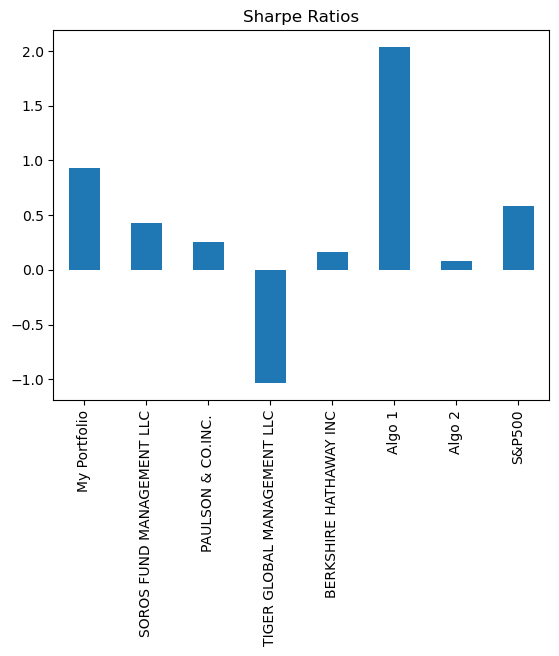

In [217]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe Ratios')


### How does your portfolio do?

Write your answer here!

My Portfolio is positive and generating returns. With a Sharpe Ratio higher than the S&P500, I'd say its a good risk-adjusted portfolio. 